<center> <h1>Target Classifaction for a Market Campaign</h1> </center>

### What is this dataset trying to predict?<br>
If given data about a client we can predict if he will subsrice to a term deposit or not

### What is a Term depost?<br>
In a normal bank acount the client has the option to witdraw money from the acount at any given time.<br> A Term deposit is a fixed-term investment which means the client has to leave money in the bank without the option to withdraw from it for a fixed period/

### What is in it for me and  the bank?
The Banks are willing to pay more interest for a term deposit.<br>
The money will stay deposited for a fixed time period, This helps them better manage their money.

## Feature Description

### Bank client data

Age: age of the client

Job: type of job :admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown

Marital: is the martial status of the client:married,single,divorced

Education: the level of education of the target: primary(elemetary school),secondary(middle school or high school in US),tertiary (any level of education pursued beyond high school),unknown

Default: has credit in default?

Balance: The clients saving in the bank

Housing: has housing loan?

loan: has personal loan?


### Related to last contact of current campaign:

Contact: contact communication type: cellular, telephone

Day:  last contact day of the month : mon, tue, wed , thu , fri

Month:  last contact month of year: jan, feb,...., nov, dec.

Duration:  last contact duration, in seconds (numeric). this feature affects the model to much cause it basically we want to predict to answer before the last contact.

### Other attributes

Campaign: number of contacts performed during this campaign and for this client(includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 means 'was not previously contacted)

Previous: number of contacts performed before this campaign and for this client

Poutcome: outcome of the previous marketing campaign -failure, nonexistent, success

### Target

deposit: Tells if the bank client subscribed a term depsit

## Libraries :

In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## First look

In [492]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
bank.shape

(11162, 17)

<center> <h1>Data preprocessing</h1> </center>

**Steps involves in Data Preprocessing**
- Data Cleaning
- Identifying and removing outliers(visulazition)
- Endcoding categorial variables

### Data Cleaning

In [72]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There data seems already clean, lets check!

In [73]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Yes, the data is alreday clean

### Identifying and removing outliers

The first thing we have to do is to drop the feature 'duration' which is the duration of the last contact
which gives us too much knowledge of the answer and as same time we want to predict if the client subscribes for term deposit before our last contact with him.

In [210]:
bank = bank.drop(['duration'], axis = 1)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [211]:
bank.describe()

,age,balance,day,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000


In [306]:
bank.age.count()

11118

This guves us an even better picture about the datasets and the clients
1. About Age we can tell that most clients are between 30 and 50 with the mean and std 
2. We know all clients are at a legal age(18 and above)thanks to min
3. The mean in ballance is 1528 while median is just 550 and max is at 81k this is still in the realm of possibility
4. most clients havent been contacted for at least half a month(day, mean)
5. all clients have been contacted at least 1 time (campaign, min)
6. mean of pdays is at 51 yet median at -1 which even 75% is just at 20, some clients had a lot of inluenc of the mean, some cap has to be put
7. more than half of the clients have never been contacted in the previous campaign (pdays, 50%)

In [268]:
#lest check if there is a Feature with only one value
bank.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3798
housing         2
loan            2
contact         3
day            31
month          12
campaign       36
pdays         431
previous       32
poutcome        4
deposit         2
dtype: int64

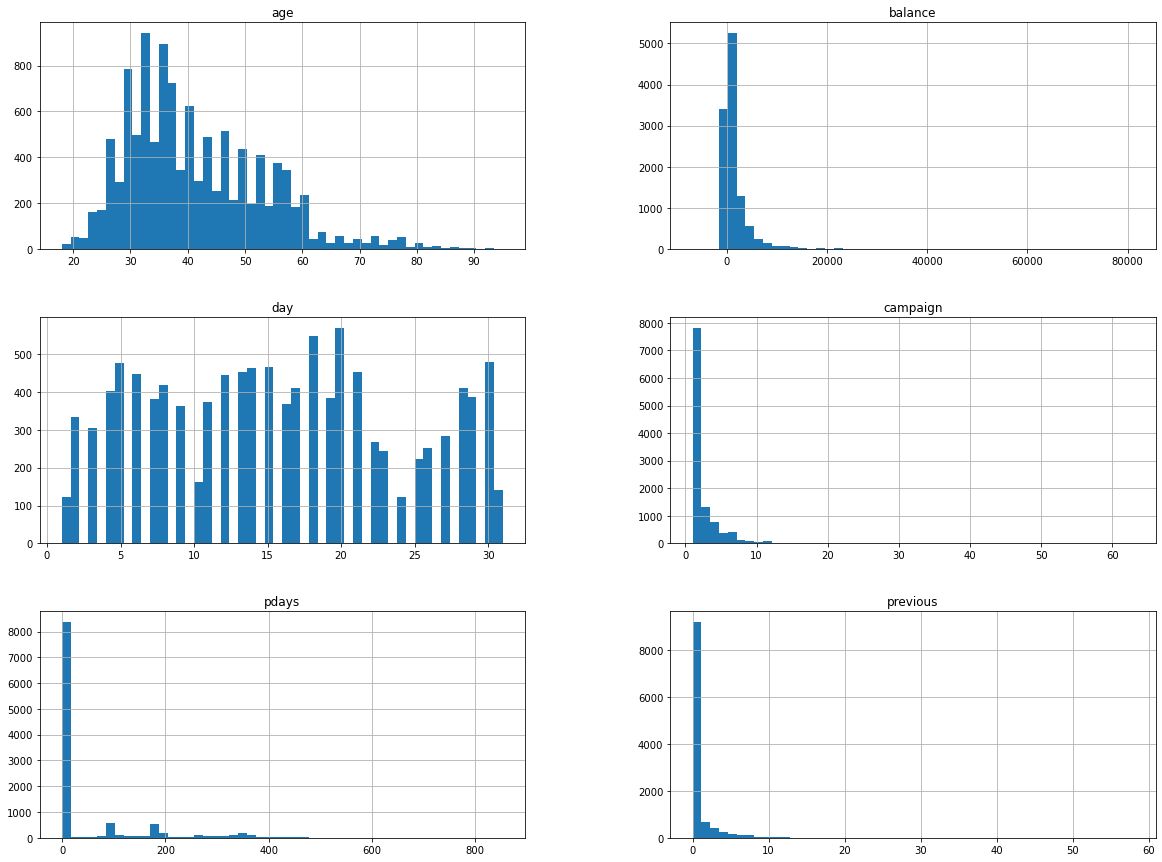

In [212]:
bank.hist(bins=50, figsize = (20,15))
plt.show()

Some thinks seem to be diffrent when we watch the histograms
1. The mean for balance seems to be influced by people with a lot money 
2. we can clearly see that most have probably never been contacted and the ones with over half a year of no contact wil probaly not want one any more.
3. Prevous seems to have some anomolys


<AxesSubplot:xlabel='age'>

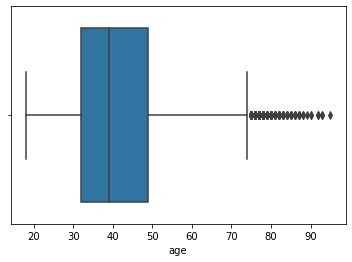

In [318]:
#we need to know what is the amount of anomolys
sns.boxplot(x = 'age', data = bank)

In [345]:
print("numer of anomolys above and 75:",format((bank.age >=75).sum()))
print("numer of anomolys above and 80:",format((bank.age >=80).sum()))
print("numer of anomolys above and 85:",format((bank.age >=85).sum()))
print("numer of anomolys above and 90:",format((bank.age >=90).sum()))

numer of anomolys above and 75: 171
numer of anomolys above and 80: 72
numer of anomolys above and 85: 24
numer of anomolys above and 90: 7


<AxesSubplot:xlabel='balance'>

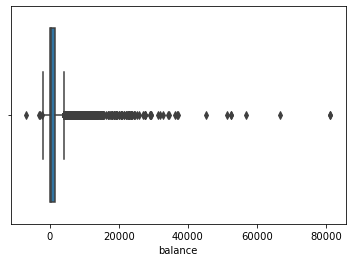

In [326]:
sns.boxplot(x = 'balance', data=bank)

In [328]:
#there seem to be some heavier anomolys from 40k and on
print("numer of anomolys above 40k:",format((bank.balance >40000).sum()))
print("numer of anomolys above 30k:",format((bank.balance >30000).sum()))
print("numer of anomolys above 20k:",format((bank.balance >20000).sum()))
print("numer of anomolys above 10k:",format((bank.balance >10000).sum()),"which is ",round((bank.balance >10000).sum()/bank.age.count(),3),"% of the data set")

numer of anomolys above 40k: 8
numer of anomolys above 30k: 16
numer of anomolys above 20k: 57
numer of anomolys above 10k: 227 which is  0.02 % of the data set


<AxesSubplot:xlabel='campaign'>

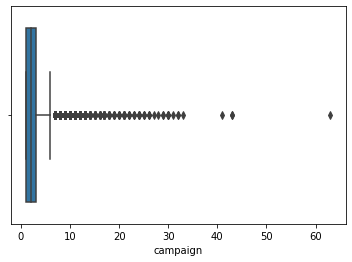

In [329]:
sns.boxplot(x = 'campaign', data=bank)

In [336]:
print("numer of anomolys above 30:",format((bank.campaign >30).sum()))
print("numer of anomolys above 20:",format((bank.campaign >20).sum()))
print("numer of anomolys above 10:",format((bank.campaign >10).sum()))

numer of anomolys above 30: 8
numer of anomolys above 20: 42
numer of anomolys above 10: 210


<AxesSubplot:xlabel='previous'>

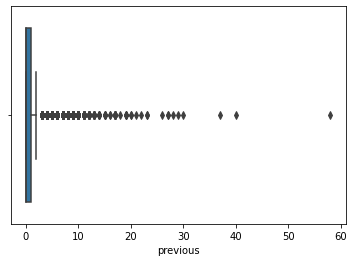

In [346]:
sns.boxplot(x = 'previous', data=bank)

In [354]:
print("numer of anomolys above 30:",format((bank.previous >30).sum()))
print("numer of anomolys above 20:",format((bank.previous >20).sum()))
print("numer of anomolys above 10:",format((bank.previous >10).sum()))

numer of anomolys above 30: 5
numer of anomolys above 20: 15
numer of anomolys above 10: 96


<AxesSubplot:xlabel='pdays'>

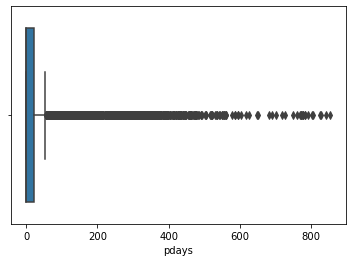

In [351]:
sns.boxplot(x = 'pdays', data=bank)

In [353]:
print("number of anomolys with pday above half a year:",format((bank.pdays > 534).sum()))
print("number of anomolys with pday above w year:",format((bank.pdays > 712).sum()))

number of anomolys with pday above half a year: 44
number of anomolys with pday above w year: 19


We have seen that the Data set has huge amount anomolys but that only means when probably cant look at them like anomolys, but i still want to put some cap on the data set because there seem to be anomolys in anomolys

**Who will be removed by the cap**
- Age: clients above 90
- Balance: clients with balance higher than 40k
- Campaign: clients above 30
- Previous: clients above 30
- Pdays: clients above 2 years

In [355]:
bank = bank.drop(bank[bank['age'] > 90].index)
bank = bank.drop(bank[bank['balance'] > 40000].index)
bank = bank.drop(bank[bank['campaign'] > 30].index)
bank = bank.drop(bank[bank['previous'] > 30].index)
bank = bank.drop(bank[bank['pdays'] > 712].index)

### Lets look at categoric data

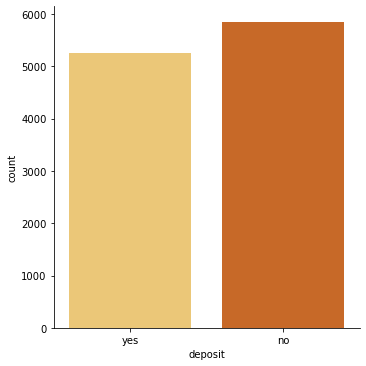

In [358]:
sns.catplot(x = "deposit", kind = "count", palette = "YlOrBr" , data = bank)

The data set seem the be fairly distrubaited in terms of deposit

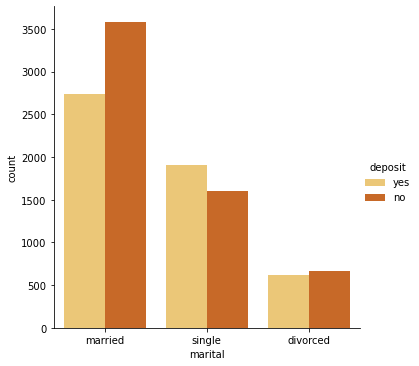

In [402]:
sns.catplot(x = "marital", kind = "count",hue="deposit", palette = "YlOrBr" , data = bank)

- Single people are actullay the most likely to term a deposit
- More than half of Married and divored people dont got a deposit

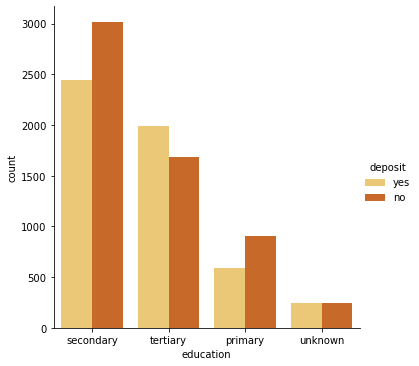

In [405]:
sns.catplot(x = "education", kind = "count",hue="deposit", palette = "YlOrBr" , data = bank)

A higher education rises the probablity to subcribe to a term deposit

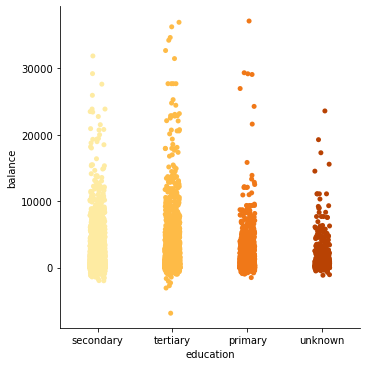

In [408]:
sns.catplot(x = "education",y='balance', palette = "YlOrBr" , data = bank)

- people with teritary and secondary education have more or less the same balance
- while primary seems to be less in balance we cant really know, maybe its just because we a lesser amount of them

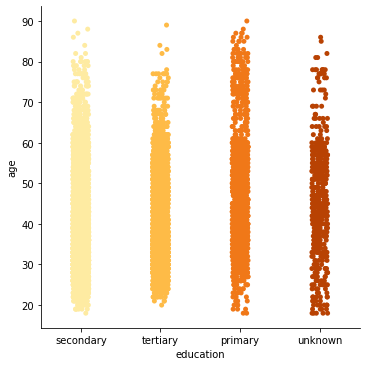

In [409]:
sns.catplot(x = "education", y = 'age', palette = "YlOrBr" , data = bank)

- expect for unknown it seem the amount of people in the 70's and 80's matter
- people with  primry education come with all ages.
- it seem most clients of 18 and higher have a secondary education
- teritary education actully has the least people

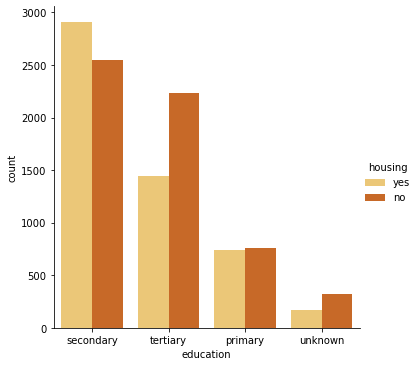

In [412]:
sns.catplot(x = "education", kind = "count",hue="housing", palette = "YlOrBr" , data = bank)

Very logical

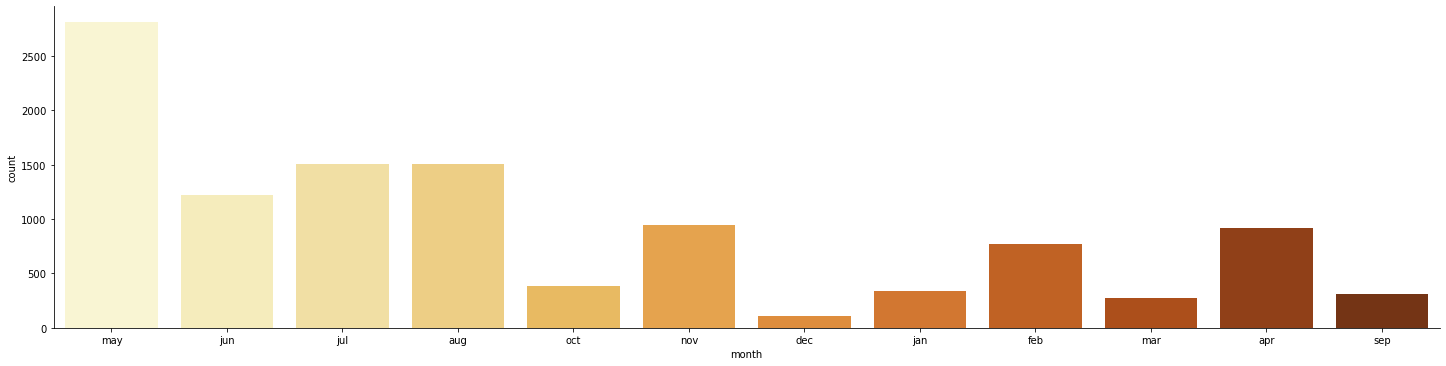

In [385]:
sns.catplot(x = "month", kind = "count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

Most people get contacted between may to aug and nov

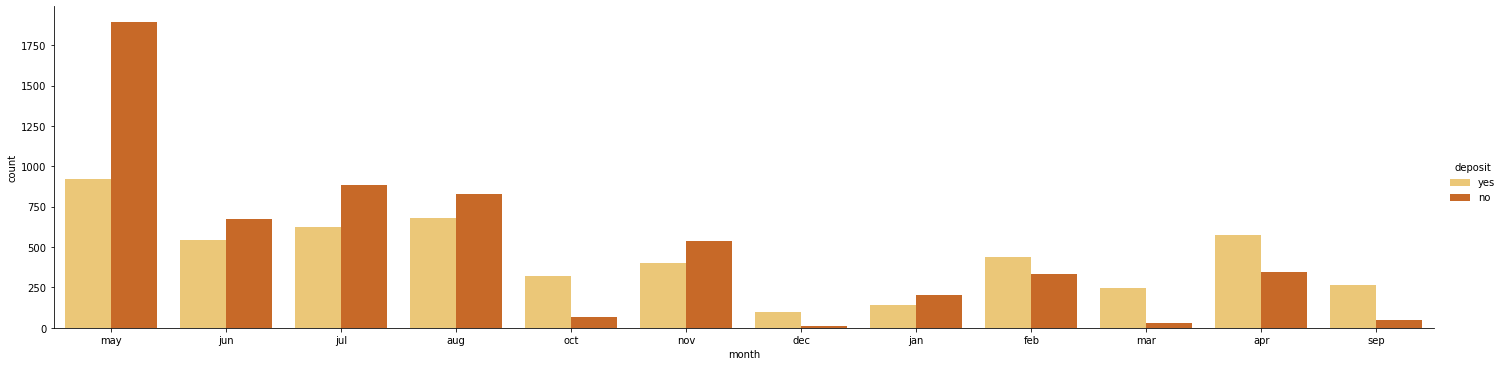

In [396]:
sns.catplot(x = "month", hue="deposit", kind = "count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

We can see that may to aug and nov also has the lowest chance to get people to subscribe to a Term Deposit espically may<br>And actually the other months have a much ratio

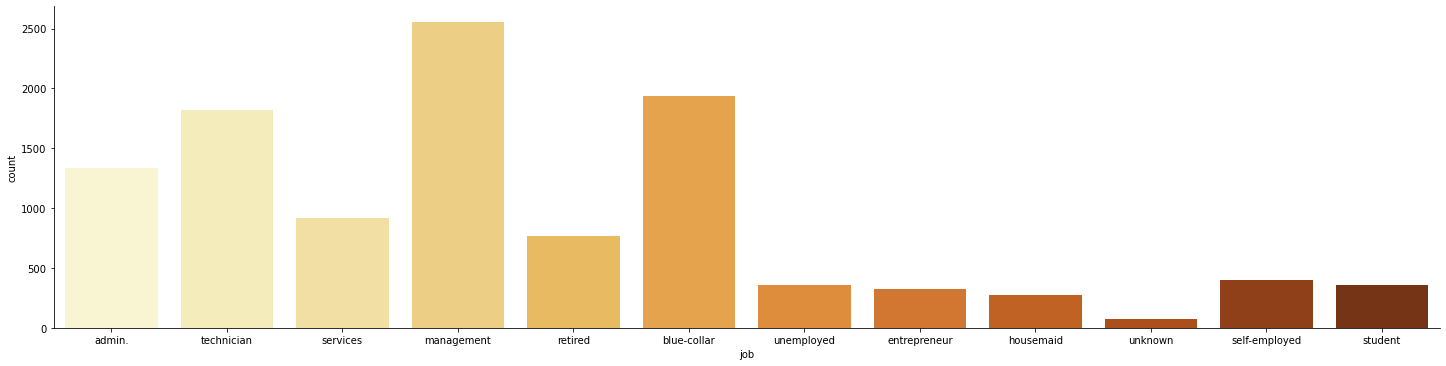

In [384]:
sns.catplot(x = "job", kind = "count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

admin,technician,managmenta and bluecollar seem to get most contact with the campaing

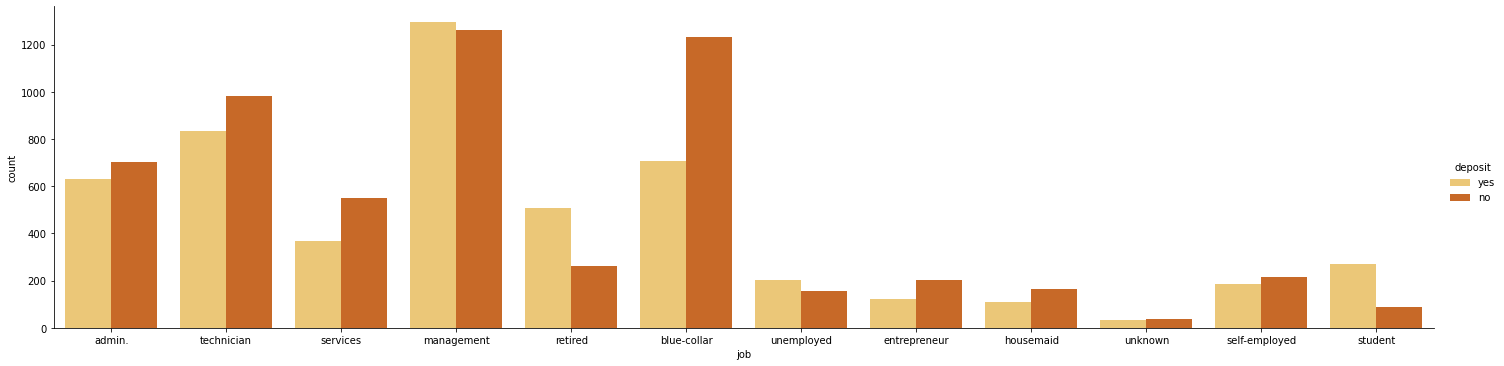

In [395]:
sns.catplot(x="job", hue="deposit", kind="count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

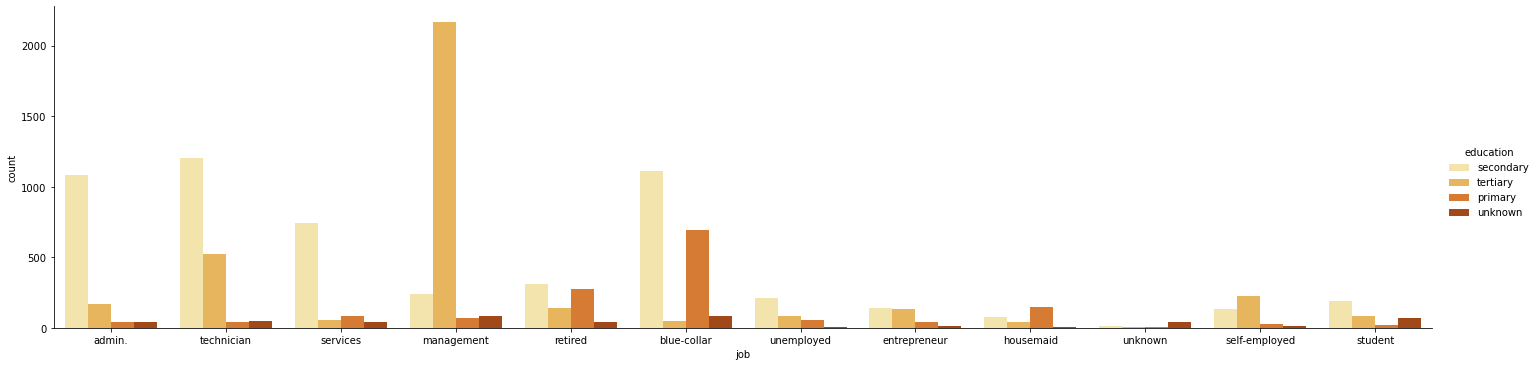

In [415]:
sns.catplot(x="job", hue="education", kind="count", palette = "YlOrBr" , data = bank, height=5,aspect=4)

- blue collar has highest amount of people with primary education which explains the low  amount of people with a term deposit
- We can understand why admin,technichian, and servies have a higher probabilty to get a term deposit
- managment has the highest ratio of people with higher education(tertiary)
- Students have the best ratio for getting Term deposits

**Small Summary**
- The higher the education the higher probabilty to get a term deposit
- People who married or were married are less to get a deposit
- May to Aug is the worst time to contact clients for a deposit
- People with a teritiary education are less likly to hava house loan
- Of the given jobs Managment has the highest amount of people with a teritiary education
- It seems people with lower responsibilties are more likely to term a deposit

### Encoding categorical variables

In [480]:
# Get list of categorical variables
cat = (bank.dtypes =="object")
object_cols = list(cat[cat].index)

# Make copy to avoid changing original data
label_bank = bank.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_bank[col] = label_encoder.fit_transform(label_bank[col])
label_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


<center><h1>Model Training<h1><center>

In [426]:
X= label_bank.drop(["deposit"],axis =1)
y= label_bank["deposit"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

### K-Nearest-Neighbor

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1758
           1       0.76      0.76      0.76      1578

    accuracy                           0.77      3336
   macro avg       0.77      0.77      0.77      3336
weighted avg       0.77      0.77      0.77      3336

Accuracy:  0.7730815347721822


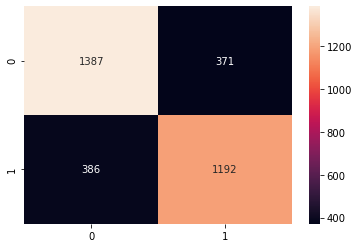

In [478]:
#fit the model
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
#make predictions
Y_pred1 = knn.predict(X_test)
#evaluate predictions
confmat = confusion_matrix(y_test, Y_pred1)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, Y_pred1)
acc_score1 = accuracy_score(y_test, Y_pred1)
print(class_rep1)
print("Accuracy: ", acc_score1)

### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1758
           1       0.77      0.76      0.77      1578

    accuracy                           0.78      3336
   macro avg       0.78      0.78      0.78      3336
weighted avg       0.78      0.78      0.78      3336

Accuracy:  0.7799760191846523


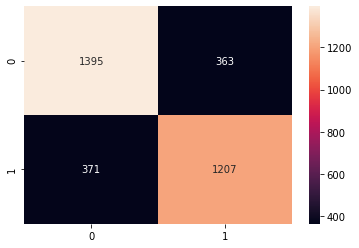

In [445]:
#fit the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
#make predictions
Y_pred3 = dtree.predict(X_test)
#evaluate predictions
confmat = confusion_matrix(y_test, Y_pred3)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, Y_pred3)
acc_score1 = accuracy_score(y_test, Y_pred3)
print(class_rep1)
print("Accuracy: ", acc_score1)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1758
           1       0.77      0.72      0.75      1578

    accuracy                           0.77      3336
   macro avg       0.77      0.77      0.77      3336
weighted avg       0.77      0.77      0.77      3336

Accuracy:  0.769484412470024


C:\Users\Inons\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


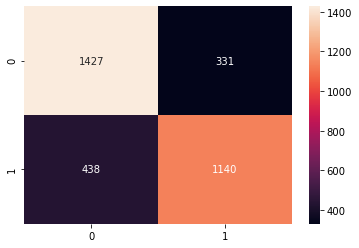

In [436]:
#fit the model
logisticR = LogisticRegression()
logisticR.fit(X_train,y_train)
#make predictions
Y_pred2 = logisticR.predict(X_test)
#evaluate predictions
confmat = confusion_matrix(y_test, Y_pred2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, Y_pred2)
acc_score1 = accuracy_score(y_test, Y_pred2)
print(class_rep1)
print("Accuracy: ", acc_score1)

# ------------------------------------------------------------------------------------------------------------

<center> <h1>Price Prediction Of Diamonds: Regression</h1> </center>

In this dataset we want to predict the prices of diamonds if we have their features and their dimensions

## Feature Description

This Dataset contains a collection of about 54 thousand diamond

**unamed:** The index counter

**Carat:** Carat is the diamons physical weight measure

**Cut:** Describe cut quality of the diamond. Quality in increasing order: *fair, Good, Very Good, Premium, Ideal*

**Color:** Color of the diamond from *J being the worst and D the best*

**Clarity:** describes how obvious inclusions or blemishes are within the diamond, in order from worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.

**Depth%:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter

**Table%:** The width of the diamond's table expressed as a percentage of its average diameter

**Price:** The price of the diamond, the target we want to predict.

**X:** length mm

**Y:** width mm

**Z:**} height mm

![](pictures/Cut-Anatomy-of-Diamond.png)

## Libraries :

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## First look

In [175]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
diamonds.shape

(53940, 11)

<center> <h1>Data preprocessing</h1> </center>

**Steps involves in Data Preprocessing**
- Data Cleaning
- Identifying and removing outliers(visulazition)
- Endcoding categorial variables

### Data Cleaning

In [67]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There seems to be no missing data! Lets check

In [68]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

There is no missing data so we can say the data is already cleaned

### Identifying and removing outliers

In [145]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


some things we learn
1. unnamed seems to have no purpose on a dataframe as its only a index
2. most diamons weight close to 1 carat but the haviest is more than 5 times heavier, it is probalbly an anomly
3. x,y,z have found a diamonds with 0mm height/length/weidth which is not possible

In [176]:
#First were going to drop the "Unnamed" feature
diamonds = diamonds.drop(['Unnamed: 0'], axis = 1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [177]:
#We first to have check at how many rows x,y,z = 0 if there are to many we cant will have to fill them
print("X = 0 at", format((diamonds.x==0).sum()),"Rows")
print("Y = 0 at", format((diamonds.y==0).sum()),"Rows")
print("Z = 0 at", format((diamonds.z==0).sum()),"Rows")

X = 0 at 8 Rows
Y = 0 at 7 Rows
Z = 0 at 20 Rows


In [178]:
#The number rows is very small so we can just drop them
diamonds = diamonds.drop(diamonds[diamonds['x']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['y']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['z']==0].index)
diamonds.shape

(53920, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

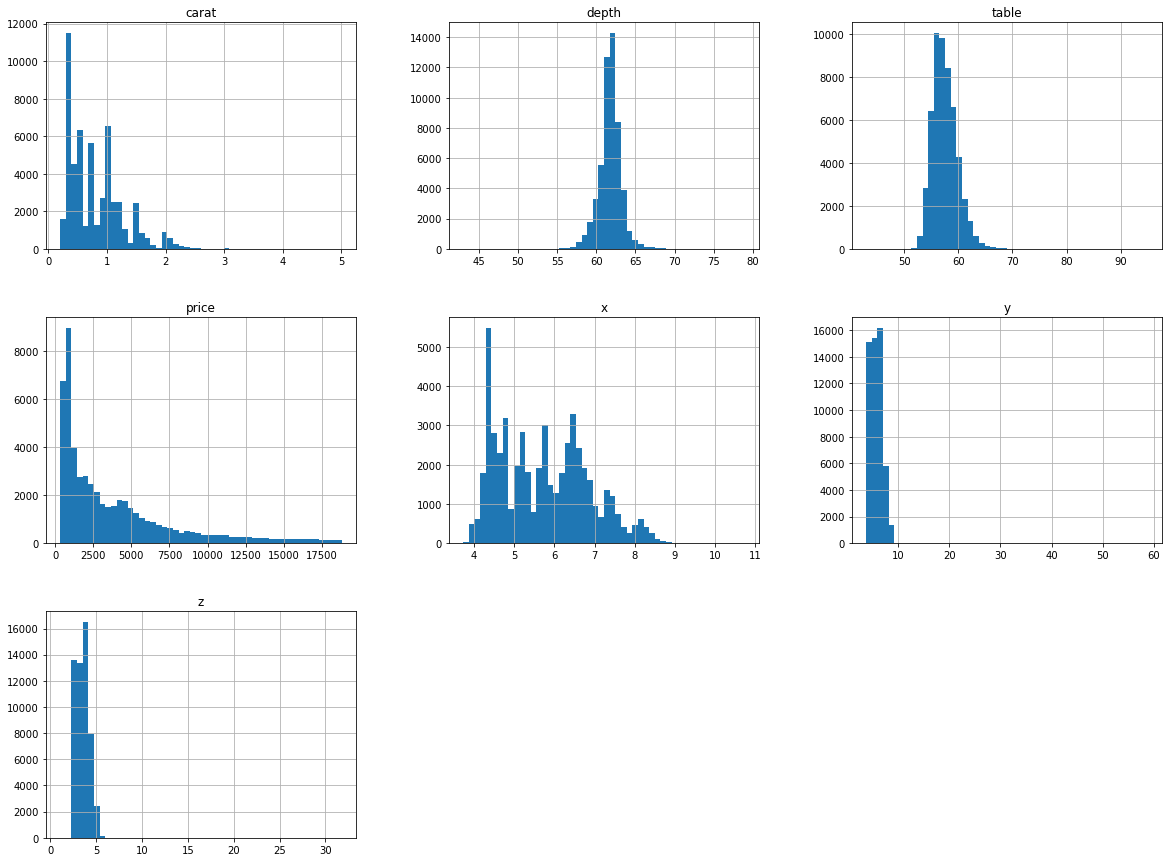

In [179]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show

- we got some comformation that carat has some anomlys
- There seems to be a illusion that X seems to be more spread unlike y or z but thats just because its more zoomed in 

In [180]:
print("diamond with a more than 3 carat:", format((diamonds.carat>3).sum()))

diamond with a more than 3 carat: 32


In [181]:
diamonds = diamonds.drop(diamonds[diamonds['carat']>3].index)

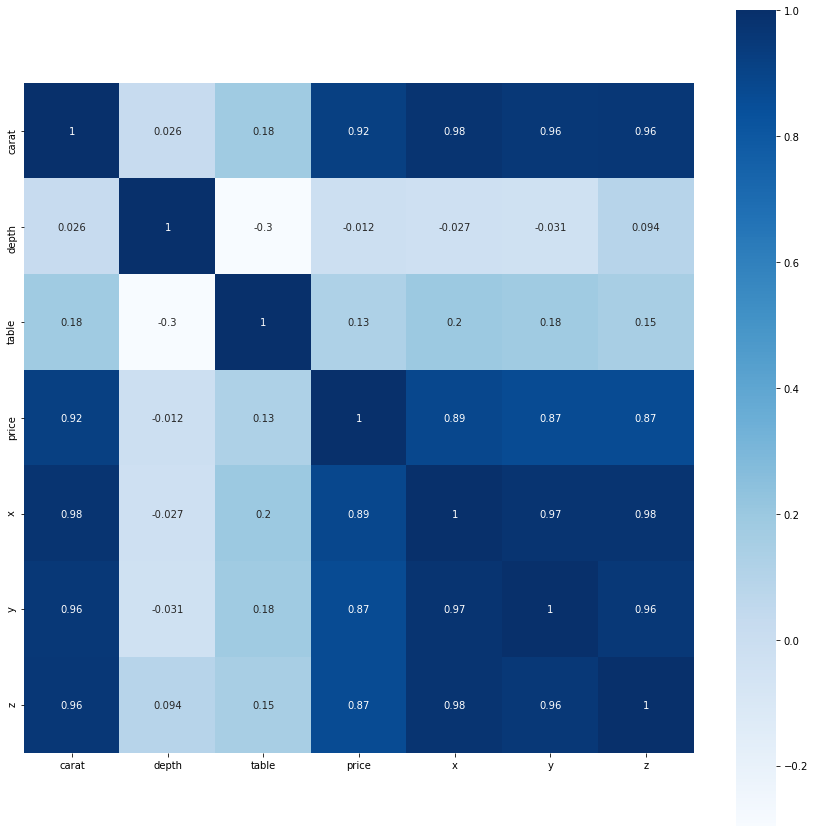

In [154]:
plt.figure(figsize=(15,15))
plot = sns.heatmap(diamonds.corr(),annot = True,cmap="Blues", square=True)

We can see 3 things
- carat has the highest relation with the prize
- x,y,z has a very high relation with the prize
- Table doesnt has to lowset relation with the prize and all other features we could drop it.
- Depth has a low relation to prize but less with the other features so it is not a very good idea to drop it

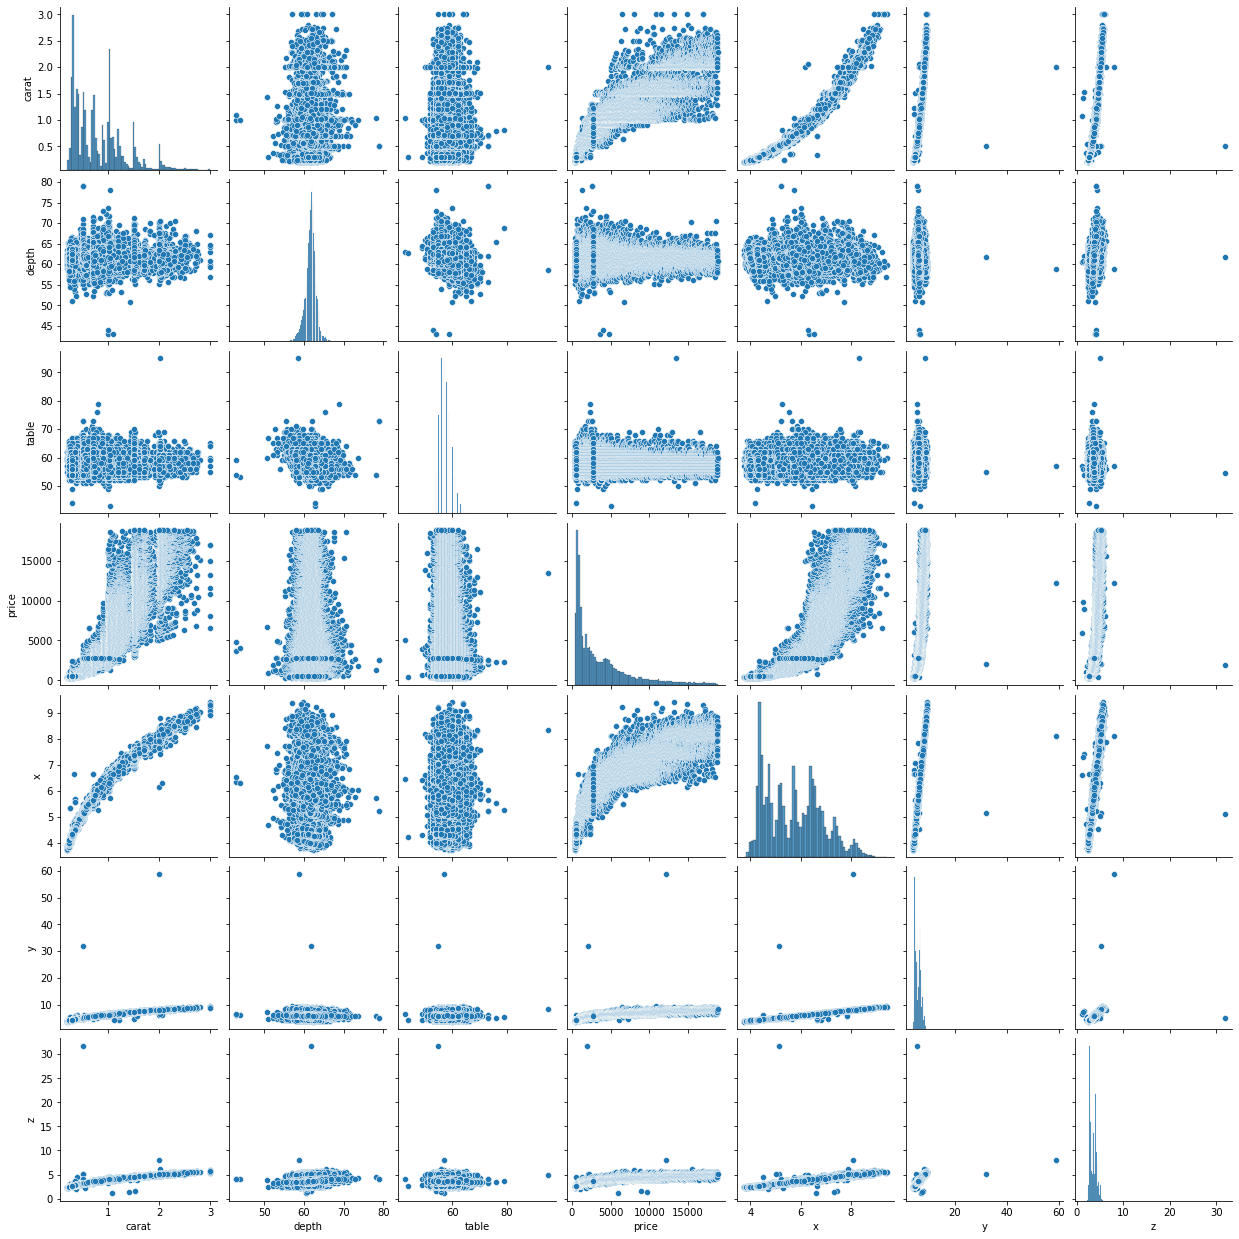

In [156]:
plot = sns.pairplot(diamonds)

if we look at the scatter between price and the other numeric features we see that there almost three diffrent groups
- At x and carat the price seems to rise fast at the start but less the higher it goes, a curve
- At depth and table it seems almost linear but thick
- At z,y we can see its almost completly linear
we can use z,y to remove anomolys maybe even depth and table

<AxesSubplot:xlabel='price', ylabel='z'>

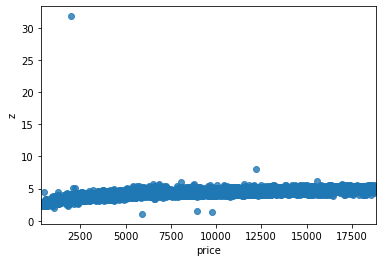

In [182]:
sns.regplot(x = 'price', y ='z', data = diamonds)

In [183]:
#we can see one of the anomolys so lets remove it
diamonds = diamonds.drop(diamonds[diamonds['z']>30].index)

<AxesSubplot:xlabel='price', ylabel='y'>

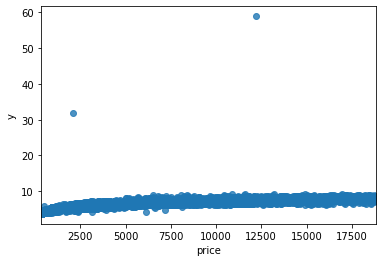

In [184]:
sns.regplot(x = 'price', y ='y', data = diamonds)

In [185]:
#we can see one of the anomolys so lets remove it
diamonds = diamonds.drop(diamonds[diamonds['y']>30].index)

<AxesSubplot:xlabel='price', ylabel='table'>

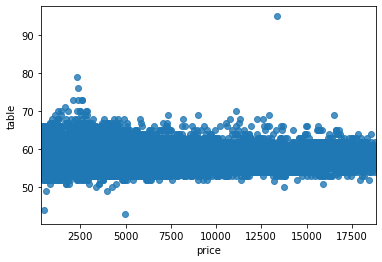

In [186]:
sns.regplot(x = 'price', y ='table', data = diamonds)

In [187]:
#we can see one of the anomolys so lets remove it
diamonds = diamonds.drop(diamonds[diamonds['table']>80].index)

<AxesSubplot:xlabel='price', ylabel='depth'>

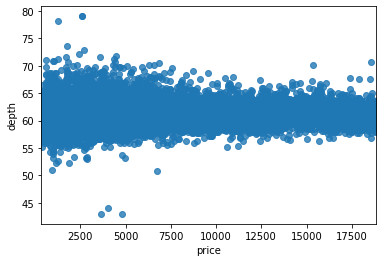

In [188]:
sns.regplot(x = 'price', y ='depth', data = diamonds)

In [189]:
#we can see one of the anomolys so lets remove it
diamonds = diamonds.drop(diamonds[diamonds['depth']>75].index)
diamonds = diamonds.drop(diamonds[diamonds['depth']<45].index)

#### Lets look at the categoric data

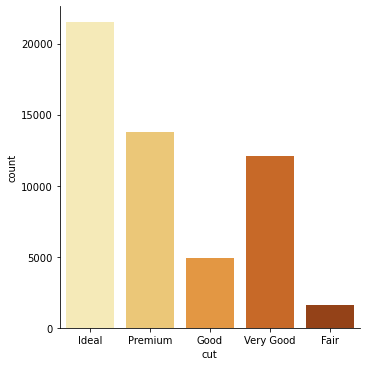

In [234]:
sns.catplot(x="cut", kind="count", palette="YlOrBr", data=diamonds);

We can see that the Data was biased towards diamonds with a better cut quality, by how the lowest quality-Fair has the least and with every quality above it grows in height/number.

Or if we look at it diffrently while color and quality are more a thing of luck (while there are ways to create artifical diamonds they are not close in quality with real ones) cut quality can be upgraded with better techniques or better machines and it is less luck more experince and knowledge.<br>So if thats the case maybe the amount fair ones is low because it may count as a defect one or was made by new companys.

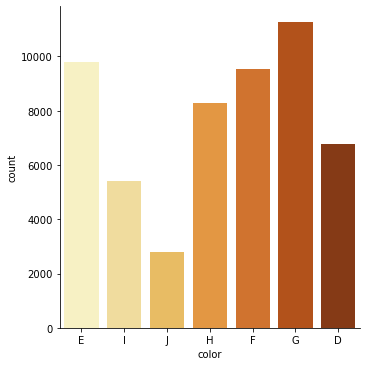

In [235]:
sns.catplot(x="color", kind="count", palette="YlOrBr", data=diamonds);

![](pictures/color_scale.png)

By looking at the scale we have the highest amount of G,F the ones in the middle in terms of grades but D,E the highest color grades have almost the same only I,J have a lot less than the rest so:
- The dataset was biased and we cleary got a higher amount of higher grade diamonds
- This bias has an effect on cut quality as well, only more professinal diamond cutters would get diamonds of this quality

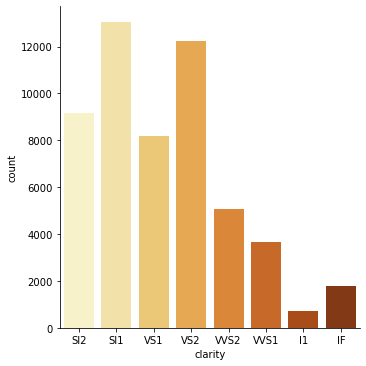

In [236]:
sns.catplot(x="clarity", kind="count", palette="YlOrBr", data=diamonds);

Quality in order from worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

A very natutal order and very unbiased compared to the 2 other categoric features

### Encoding categorical variables

In [422]:
labelDia = diamonds.copy() #making a copy for security
label_encoder = LabelEncoder()
labelDia['cut'] =  label_encoder.fit_transform(labelDia['cut'])
labelDia['color'] =  label_encoder.fit_transform(labelDia['color'])
labelDia['clarity'] =  label_encoder.fit_transform(labelDia['clarity'])
labelDia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<center> <h1>Model Building</h1> </center>

In [423]:
X= labelDia.drop(["price"],axis =1)
y= labelDia["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

In [424]:
#fit the model
model = LinearRegression()
model.fit(X_train,y_train)
#make predictions
Y_pred = model.predict(X_test)
#evaluate predictions
print("accuracy: "+ str(model.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,Y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,Y_pred)))
R2 = r2_score(y_test,Y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 89.05508463132051%
Mean absolute error: 837.2790313364962
Mean squared error: 1711478.6472817515
R Squared: 0.8905508463132051
Adjusted R Squared: 0.890496646794202


# The END?